In [2]:
import tensorflow as tf
import keras
import os
import random 
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


In [3]:
from tensorflow.keras.models import load_model
model = load_model('resnet50')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 25,694,088
Trainable params: 25,640,968
Non-trainable params: 53,120
_______________________________________

In [27]:
import pandas as pd
import seaborn as sn

dataset_path = 'C:/Users/abdul basit/Documents/Aliya_FYP/Train_Test_Folder'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# normalize according to model architecture
from tensorflow.keras.applications.resnet50 import preprocess_input , decode_predictions

img_height, img_width = (224,224)
batch_size = 32

aug = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_ds = aug.flow_from_directory(
  dataset_path+'/train/',
  target_size= (img_height, img_width),
  class_mode = 'categorical',
  batch_size = batch_size,
  subset = "training")

valid_ds = aug.flow_from_directory(
  dataset_path+'/val/',
  target_size= (img_height, img_width),
  class_mode = 'categorical',
  batch_size = batch_size,
  subset = "validation")

test_ds = aug.flow_from_directory(
  dataset_path+'/test/',
  target_size= (img_height, img_width),
  class_mode = 'categorical',
  batch_size = 1,
  subset = "validation")


Found 4070 images belonging to 8 classes.
Found 336 images belonging to 8 classes.
Found 337 images belonging to 8 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 1s 1s/step
Peach___Bacterial_spot
Peach___Bacterial_spot


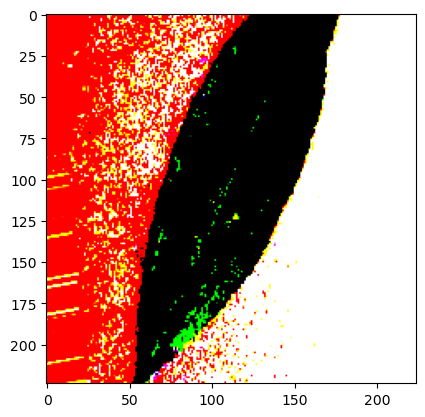

In [51]:

class_names = ['Grape___Black_rot','Grape___healthy','Peach___Bacterial_spot','Peach___healthy'
               ,'Rose___Black_spot','Rose___healthy','Tomato___Late_blight','Tomato___healthy']


X_test , Y_test = test_ds.next()
plt.imshow(X_test.reshape(224,224,3))
predicted_class_index = model.predict(X_test).argmax()
actual_class_index = Y_test.argmax()

predicted_class_name = class_names[predicted_class_index]
actual_class_name = class_names[actual_class_index]
print(predicted_class_name)
print(actual_class_name)

1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 1s 980ms/step


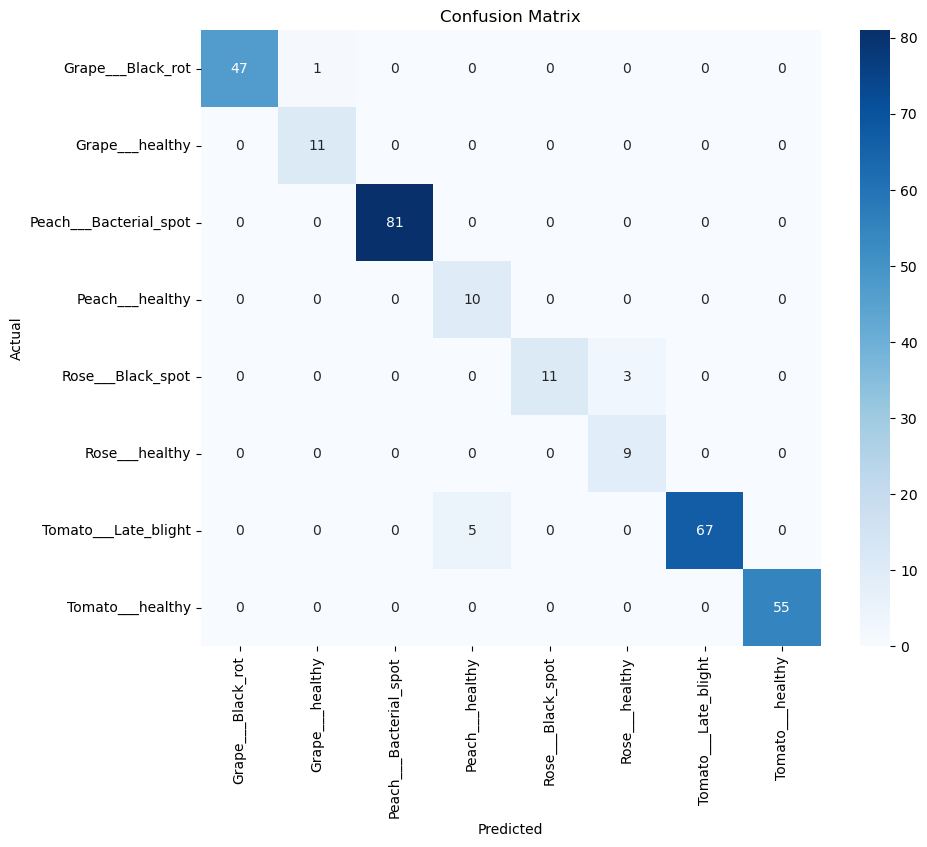

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## train dataset indices which class name
train_ds.class_indices
class_names = ['Grape___Black_rot','Grape___healthy','Peach___Bacterial_spot','Peach___healthy'
               ,'Rose___Black_spot','Rose___healthy','Tomato___Late_blight','Tomato___healthy']


# Make predictions on the test dataset
y_true = []
y_pred = []
i=0
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_true.extend(labels)
    y_pred.extend(predicted_labels)
    i =i+1
    if i == 300:
        break
        
y_true=np.argmax(y_true, axis=1)
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get the class labels

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
